In [1]:
"""
@author: Rajat Narang

Train the SOM Offline
"""

%matplotlib inline
from numpySOM import SOM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#Read in the data
dataset = pd.read_csv('cassandra_data_23April.csv', index_col=0)

In [3]:
dataset.head()

,collectd_cpu_percent_node1,collectd_cpu_percent_node2,collectd_cpu_percent_node3,memory_node1,memory_node2,memory_node3
2019-04-23 04:31:00,1.253133,0.251256,0.251256,10.917618,8.468021,8.524799
2019-04-23 04:31:01,1.253133,0.750000,0.000000,10.917618,8.468021,8.524799
2019-04-23 04:31:02,0.751880,0.748130,0.750000,10.917618,8.468021,8.524799
2019-04-23 04:31:03,0.500000,0.000000,0.251889,10.917618,8.468021,8.524799
2019-04-23 04:31:04,0.000000,0.750000,0.750000,10.917618,8.468021,8.524799


In [4]:
'''
Normalise the data in range 0-1, use sklearn's MinMaxScaler to do that
'''
X = dataset.values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [5]:
len(X)

27212

In [6]:
"""
A rule of thumb to set the size of the grid for a dimensionality
reduction task is that it should contain 5*sqrt(N) neurons
where N is the number of samples in the dataset to analyze.

E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
hence a map 8-by-8 should perform well.
"""
x_dim = int(math.sqrt(5*math.sqrt(len(X))))
y_dim = x_dim

In [7]:
features = len(dataset.columns)
learning_factor = 0.7
neighborhood_radius = 4

In [8]:
#Initialise the SOM model
som = SOM(M=x_dim, N=y_dim, noof_features=features, radius=neighborhood_radius, learning_rate=learning_factor)

In [9]:
# Initialise the weights and train the model
som.randomly_initialise_weights(X)
som.train_random(X, total_iterations=20000)

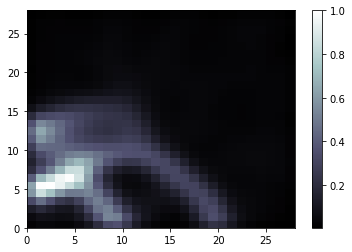

In [10]:
# Visialise the map
MID_map = som.get_MID_map()
from pylab import bone, pcolor, colorbar, plot, show, figure
bone()
pcolor(MID_map.T)
colorbar()

In [11]:
from numpySOM import save, load

In [12]:
# Save the model and the min-max scaler
save(som, 'cassandra_som.pkl')
save(sc, 'cassandra_sc.pkl')